In [70]:
import pandas as pd
import numpy as np

train_data=pd.read_csv('/users/fan/desktop/kaggle/bike_sharing/train.csv')
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [71]:
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**探索数据**

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

**观察数据分布**

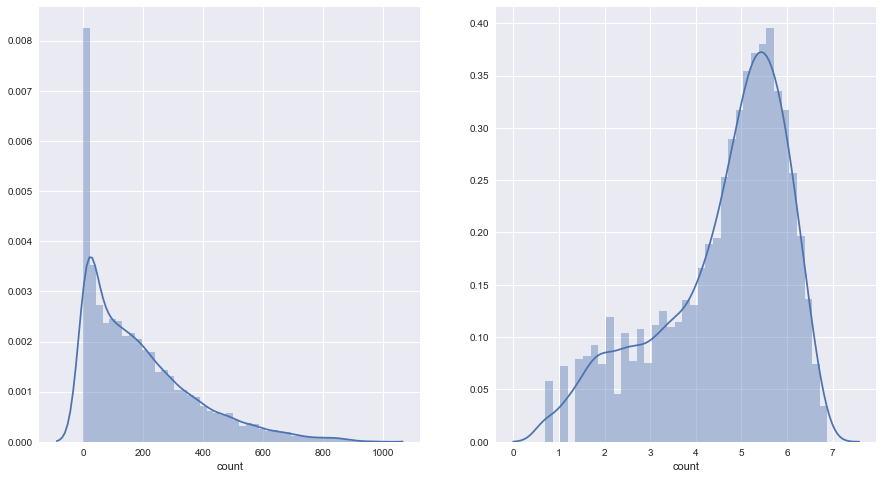

In [74]:
fig,axes=plt.subplots(1,2,figsize=(15,8))
sn.distplot(train_data['count'],ax=axes[0])
sn.distplot(np.log1p(train_data['count']),ax=axes[1])

count是偏态分布，对于因变量，最好是近似正态分布。通过取对数后数据更近似正态分布，之后对count进行对数处理。

**观察各特征与count的关系**

season,holiday,workingday,weather变为category类型

拆分datetime，看租车数量与小时，月份有没有关系

In [75]:
from datetime import datetime
train_data['date']=train_data.datetime.apply(lambda x:x.split()[0])
train_data['month']=train_data.date.apply(lambda x:datetime.strptime(x,'%Y-%m-%d').month)
train_data['hour']=train_data.datetime.apply(lambda x:x.split()[1].split(':')[0])
train_data['weekday']=train_data.date.apply(lambda x:datetime.strptime(x,'%Y-%m-%d').weekday())#0-星期一

category=['season','holiday','workingday','weather','month','hour','weekday']
for var in category:
    train_data[var]=train_data[var].astype('category')

train_data=train_data.drop('datetime',axis=1)
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,month,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,00,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,01,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,02,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,03,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,04,5


1、时间与租车数的关系

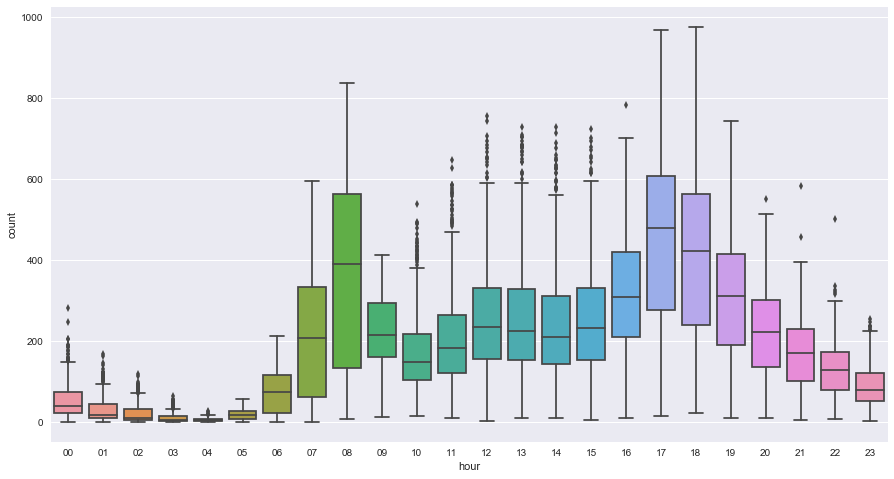

In [76]:
fig,ax=plt.subplots(figsize=(15,8))
sn.boxplot(data=train_data,y='count',x='hour')

不同时间段租车数不同，8点、17点和18点有租车高峰。hour这个特征需要考虑

2、季节和月份与租车数的关系

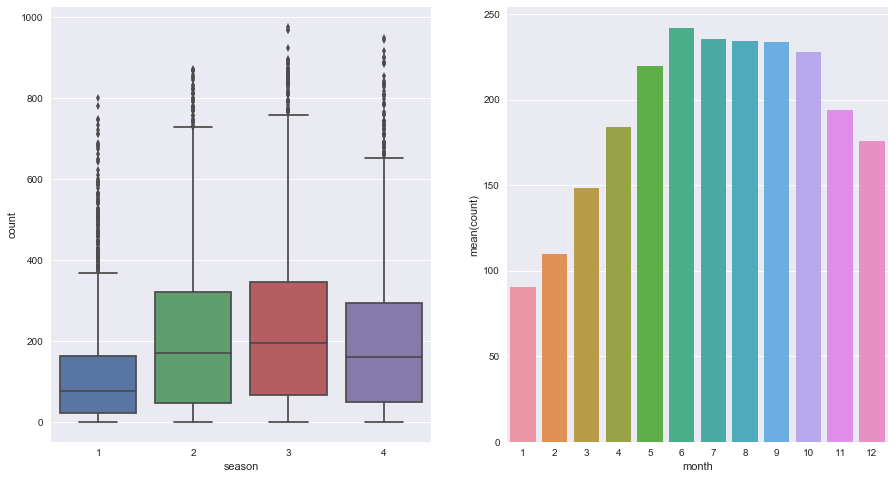

In [77]:
fig,axes=plt.subplots(1,2,figsize=(15,8))
sn.boxplot(data=train_data,y='count',x='season',ax=axes[0])

month=pd.DataFrame(train_data.groupby('month')['count'].mean()).reset_index()
sn.barplot(data=month,x='month',y='count',ax=axes[1])

春季租车人数最少，秋季最多；季节拆分到月份后，每个月租车数有显著差异

3、星期几与租车数的关系

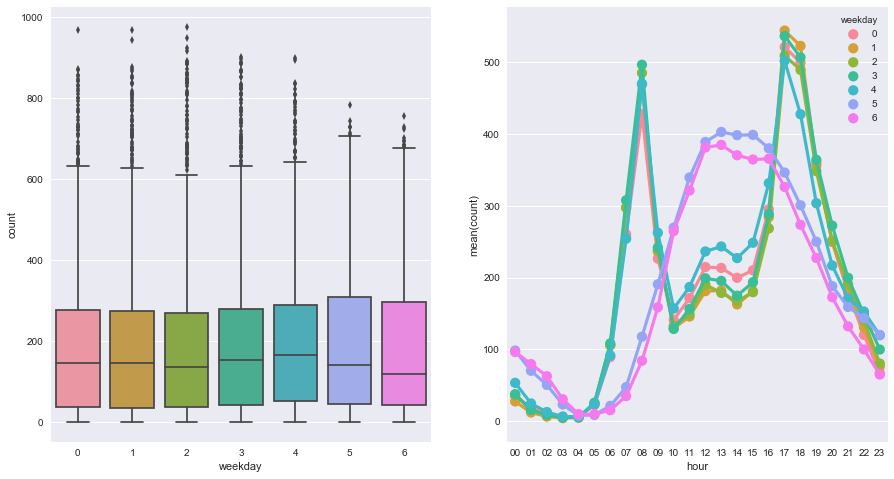

In [78]:
fig,axes=plt.subplots(1,2,figsize=(15,8))
sn.boxplot(data=train_data,y='count',x='weekday',ax=axes[0])

hour_season=train_data.groupby(['hour','weekday'])['count'].mean().reset_index()
sn.pointplot(data=hour_season,x='hour',y='count',hue='weekday',ax=axes[1])

周中租车高峰为7-9点和17-19点；周末高峰为10-16点

4、工作日和假期与租车数的关系

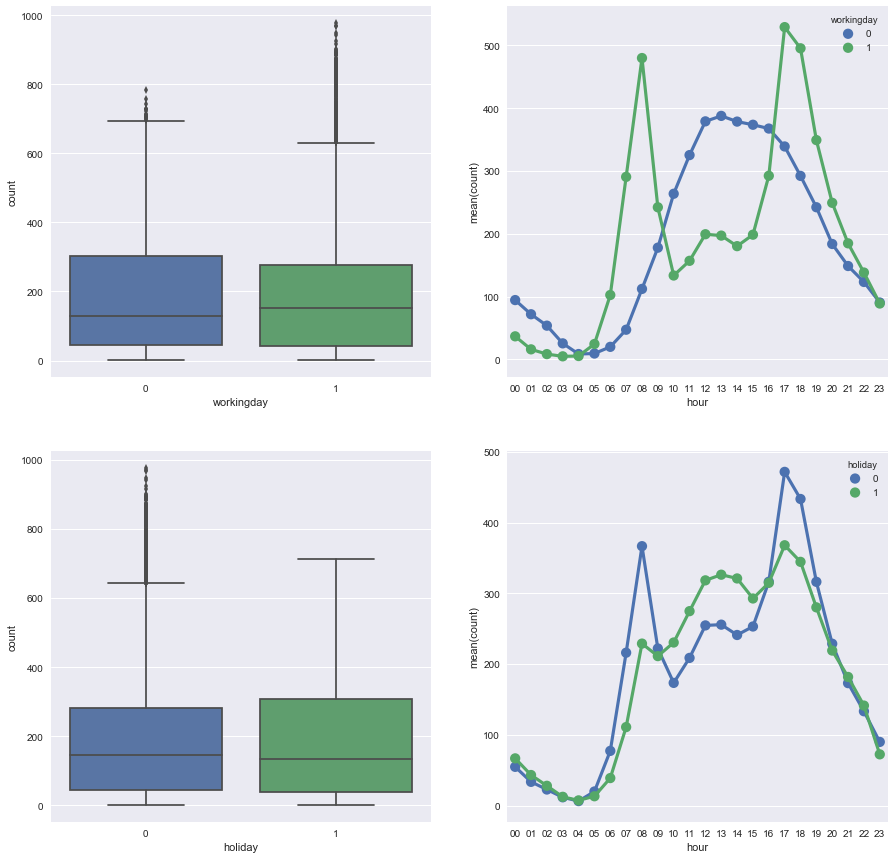

In [79]:
fig,axes=plt.subplots(2,2,figsize=(15,15))
sn.boxplot(data=train_data,y='count',x='workingday',ax=axes[0][0])
workingday=train_data.groupby(['hour','workingday'])['count'].mean().reset_index()
sn.pointplot(data=workingday,y='count',x='hour',hue='workingday',ax=axes[0][1])

sn.boxplot(data=train_data,y='count',x='holiday',ax=axes[1][0])
workingday=train_data.groupby(['hour','holiday'])['count'].mean().reset_index()
sn.pointplot(data=workingday,y='count',x='hour',hue='holiday',ax=axes[1][1])

变量workingday与count的关系与weekday相似，考虑二选一

In [80]:
#删除离群值（删除大于3倍均方差）
# train_data_withoutoutliers=train_data[np.abs(train_data['count']-train_data['count'].mean())<=(3*train_data['count'].std())]
# train_data_withoutoutliers.shape

**相关性分析**

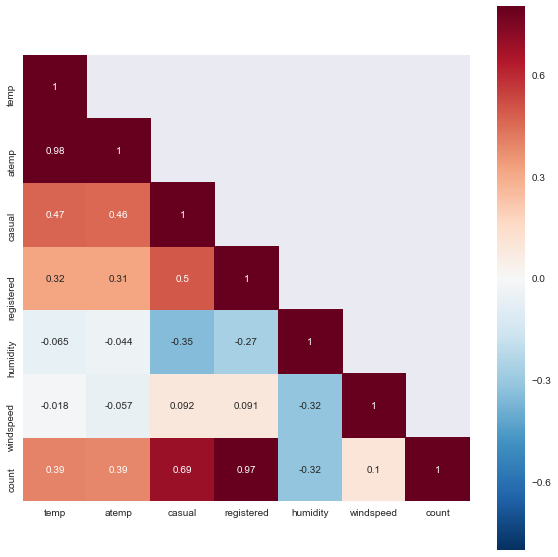

In [81]:
corrmatt=train_data[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask=np.array(corrmatt)
mask[np.tril_indices_from(mask)]=False
fig.ax=plt.subplots(figsize=(10,10))
sn.heatmap(corrmatt,mask=mask,vmax=.8,square=True,annot=True)

temp和atemp二者相关性很高，考虑只选取一个；windspeed几乎与count不相关，考虑删除这个特征

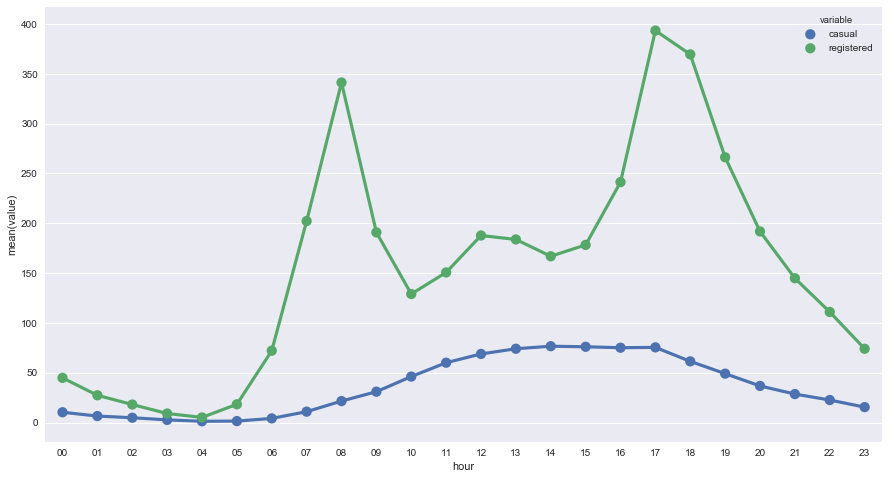

In [82]:
#pd.melt的用法
fig.ax=plt.subplots(figsize=(15,8))
hour_user=pd.melt(train_data[['hour','casual','registered']],id_vars=['hour'],value_vars=['casual','registered'])
hour_user=hour_user.groupby(['hour','variable'])['value'].mean().reset_index()
sn.pointplot(data=hour_user,x='hour',y='value',hue='variable')


注册用户租车时间有明显高峰，count=casual+registered，暂时先把casual和registered删掉

**特征工程**

In [83]:
test_data=pd.read_csv('/users/fan/desktop/kaggle/bike_sharing/test.csv')
train_data=pd.read_csv('/users/fan/desktop/kaggle/bike_sharing/train.csv')

data=train_data.append(test_data)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)


data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

category=['season','holiday','workingday','weather','month','hour','weekday']
for var in category:
    data[var]=data[var].astype('category')

data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,date,hour,year,weekday,month
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011-01-01,0,2011,5,1
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011-01-01,1,2011,5,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011-01-01,2,2011,5,1
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011-01-01,3,2011,5,1
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011-01-01,4,2011,5,1


In [127]:
#拆分train和test数据集
train_data=data[pd.notnull(data['count'])].sort_values(by='datetime')
test_data=data[~pd.notnull(data['count'])].sort_values(by='datetime')

test_date=test_data['datetime']
y=train_data['count']

drop_features=['count','casual','registered','datetime','date']

train_data.drop(drop_features,axis=1,inplace=True)
test_data.drop(drop_features,axis=1,inplace=True)
train_data.head()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday,hour,year,weekday,month
0,14.395,0,81,1,9.84,1,0.0,0,0,2011,5,1
1,13.635,0,80,1,9.02,1,0.0,0,1,2011,5,1
2,13.635,0,80,1,9.02,1,0.0,0,2,2011,5,1
3,14.395,0,75,1,9.84,1,0.0,0,3,2011,5,1
4,14.395,0,75,1,9.84,1,0.0,0,4,2011,5,1


**建模预测**

In [116]:
#评分方式 RMSLE
def rmsle(y_pred,y_true):
    log1=np.nan_to_num(np.array([np.log(v+1) for v in y_pred]))
    log2=np.nan_to_num(np.array([np.log(v+1) for v in y_true]))
    calc=(log1-log2)**2
    return np.sqrt(np.mean(calc))

1、linear regression

In [128]:
from sklearn.linear_model import LinearRegression

X=train_data
y=np.log1p(y)

lire=LinearRegression()
lire.fit(X,y)
y_pred=lire.predict(X)
rmsle(np.exp(y_pred),np.exp(y))


0.97781888295471575

2、随机森林

In [136]:
from sklearn.ensemble import RandomForestRegressor

X=train_data
y=np.log1p(y)

rfModel=RandomForestRegressor(n_estimators=100)
y=np.log1p(y)
rfModel.fit(X,y)
y_preds=rfModel.predict(X)

rmsle(np.exp(yLabelsLog),np.exp(preds))

0.0096353088959452125

In [124]:
#grid_search调参

In [137]:
results=rfModel.predict(test_data)
results=np.exp(results)

In [138]:
submission=pd.DataFrame({'datetime':test_date,'count':[max(0,result) for result in results]})
submission.to_csv('/users/fan/desktop/kaggle/bike_sharing/bike_sharing_results.csv',index=False)